In [3]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import os
import pickle
import utils


In [35]:

equation_dict = {
    'poisson_2d-sin_cos':'u = sin(100x)cos(100y)',
    'poisson_2d-sin_sin':'u = sin(100x)sin(100y)',
    'poisson_2d-sin_add_cos': 'u= sin(6x)sin(20x) + sin(6y)sin(20y) ',
    'allencahn_2d-mix-sincos':'u= (sin(x) + 0.1sin(20x) + cos(100x)) * (sin(y) + 0.1sin(20y) + cos(100y))',
    'advection-sin':'u = sin(x-200t)'
    }


def load_and_predict_2d(prefix, save_name,N_col=200,scale=1):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)
    if 'N_col' not in list(trick_paras.keys()):
        trick_paras['N_col'] = N_col

    if 'scale' not in list(trick_paras.keys()):
        trick_paras['scale'] = scale

    model, preds = utils.get_model_2d(params, trick_paras)

    return model, preds, log_dict

def load_and_predict_advection(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    model, preds = utils.get_model_2d_advection(params, trick_paras)

    return model, preds, log_dict


def draw_fig(model, preds, log_dict):

    err = min(log_dict['err_list'])
    equation_name =model.trick_paras['equation']
    kernel_name = model.cov_func.__class__.__name__

    # generate new figure
    plt.figure(figsize=(6, 6))

    plt.imshow(preds, cmap="hot")

    # print eq name, kernel_name and err as title
    plt.title('Equation: {}, \n Kernel: {},   L2 Err: {:.2e}'.format(equation_dict[equation_name], kernel_name, err))

    # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)

    # save as pdf and png
    plt.savefig(prefix + kernel_name + '.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix +kernel_name+ '.png', dpi=300, bbox_inches='tight')

def draw_error_fig(model, preds, log_dict):

    err = min(log_dict['err_list'])
    equation_name =model.trick_paras['equation']
    kernel_name = model.cov_func.__class__.__name__

    # generate new figure
    plt.figure(figsize=(6, 6))
        # set no ticks
    plt.xticks([])
    plt.yticks([])


    # plt.title('ground-truth-2d-2d')
    # print eq name, kernel_name and err as title
    # plt.title('2d-Equation: {},\n ground-truth-'.format(equation_dict[equation_name]))


    err=np.sqrt(np.square(preds-model.ute))

    plt.imshow(err, cmap="hot")

    plt.colorbar(
    location='top', 
    ticks=[err.min(), err.max()],
    shrink=0.8,
)


    # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)

    # save as pdf and png
    plt.savefig(prefix + kernel_name + '_error.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix +kernel_name+ '_error.png', dpi=300, bbox_inches='tight')


def draw_truth(model):
    equation_name =model.trick_paras['equation']

    plt.figure(figsize=(6, 6))
    plt.imshow(model.ute, cmap="hot")

    # set no ticks
    plt.xticks([])
    plt.yticks([])


    # plt.title('ground-truth-2d-2d')
    # print eq name, kernel_name and err as title
    # plt.title('2d-Equation: {},\n ground-truth-'.format(equation_dict[equation_name]))
    plt.colorbar(
    location='top', 
    ticks=[model.ute.min(), model.ute.max()],
    shrink=0.8,
)

        # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)
        # save as pdf and png
    plt.savefig(prefix + 'truth.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix + 'truth.png', dpi=300, bbox_inches='tight')


equation is:  advection-sin
kernel is: Matern52_Cos_1d
equation is:  advection-sin
kernel is: Matern52_1d
equation is:  advection-sin
kernel is: SE_1d
equation is:  advection-sin
kernel is: SE_Cos_1d


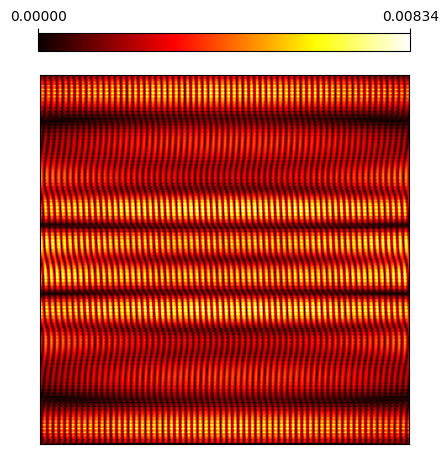

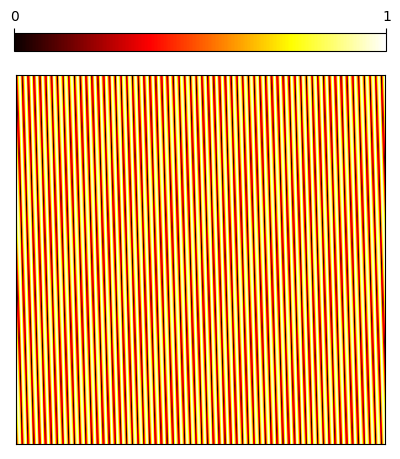

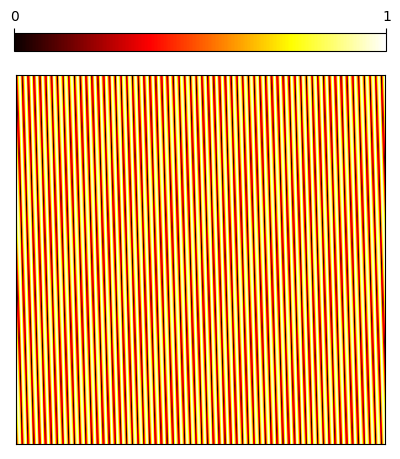

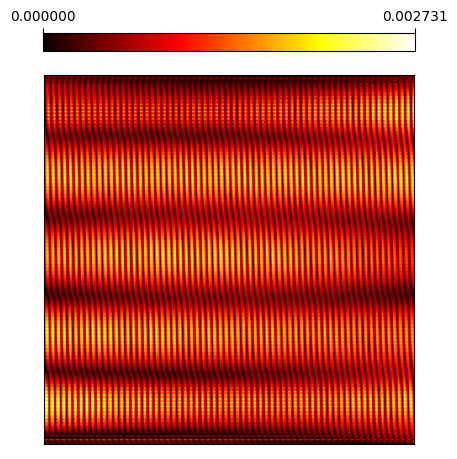

In [36]:
# for advection (x in [0, 2pi])

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=50-logdet-1-x-2pi-beta-200'

for kernel_name in kernel_list:
    prefix = '../result_log/advection-sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_advection(prefix, save_name)
    preds = np.nan_to_num(preds)
    # draw_fig(model, preds, log_dict)
    draw_error_fig(model, preds, log_dict)

# draw_truth(model)

equation is:  poisson_2d-sin_sin
kernel is: Matern52_Cos_1d
equation is:  poisson_2d-sin_sin
kernel is: Matern52_1d
equation is:  poisson_2d-sin_sin
kernel is: SE_1d
equation is:  poisson_2d-sin_sin
kernel is: SE_Cos_1d


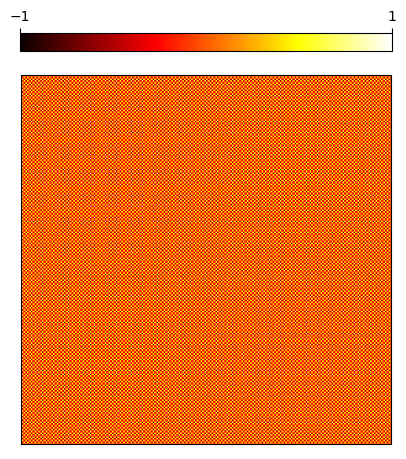

In [25]:
# for possion 2d sin-sin

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name ='llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=20-logdet-1-x-2pi-Ncol-400'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_2d-sin_sin/kernel_%s/epoch_100000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_2d(prefix, save_name)
    # draw_fig(model, preds, log_dict)
    # draw_fig(model, preds, log_dict)
    # draw_error_fig(model, preds, log_dict)


draw_truth(model)


equation is:  allencahn_2d-mix-sincos
kernel is: Matern52_Cos_1d
equation is:  allencahn_2d-mix-sincos
kernel is: Matern52_1d
equation is:  allencahn_2d-mix-sincos
kernel is: SE_1d
equation is:  allencahn_2d-mix-sincos
kernel is: SE_Cos_1d


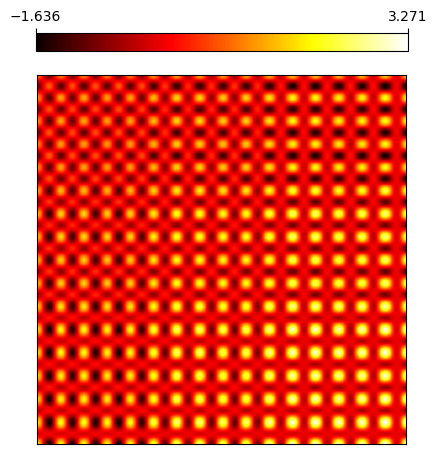

In [24]:
# for allencahn-2d sin add cos

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name ='llk_weight-200.0-nu-1-Q-30-epoch-3000000-lr-0.0100-freqscale=30-logdet-1'

for kernel_name in kernel_list:
    prefix = '../result_log/allencahn_2d-mix-sincos/kernel_%s/epoch_3000000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_2d(prefix, save_name)

#     draw_fig(model, preds, log_dict)
#     draw_error_fig(model, preds, log_dict)
draw_truth(model)

equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_Cos_1d
equation is:  poisson_2d-sin_add_cos
kernel is: Matern52_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_1d
equation is:  poisson_2d-sin_add_cos
kernel is: SE_Cos_1d


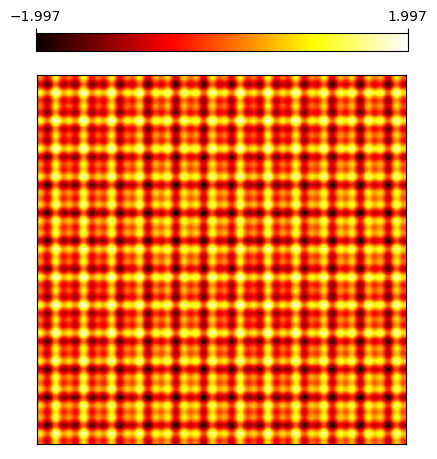

In [26]:
# for poisson-2d sin add cos

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name ='llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1-x-2pi'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_2d-sin_add_cos/kernel_%s/epoch_1000000/Q30/'%(kernel_name)

    model, preds,log_dict = load_and_predict_2d(prefix, save_name)

    # draw_fig(model, preds, log_dict)
    # draw_error_fig(model, preds, log_dict)
draw_truth(model)

In [30]:
import matplotlib.tri as tri
from matplotlib import rc
import matplotlib.pylab as plt

# model.ute.shape

temp = tri.Triangulation(np.linspace(0, 1, num=300), np.linspace(0, 1, num=300))

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.